Classification Report:

Class          Precision Recall    F1-Score  Support   

No Stroke      0.96      0.89      0.92      960       
Stroke         0.22      0.48      0.30      62        

Confusion Matrix:



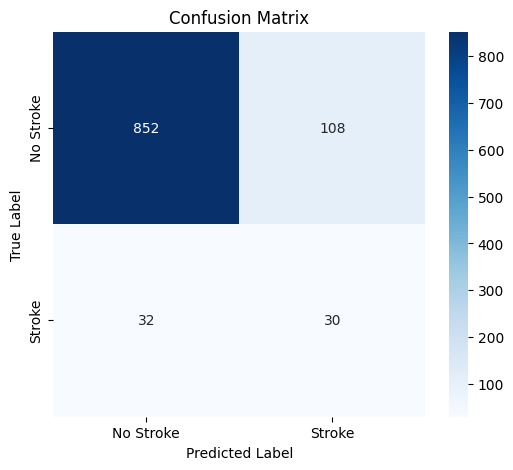

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Create LabelEncoder instance
encoder = LabelEncoder()

# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns into numbers using LabelEncoder
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

# Split the dataset
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make the predictions
y_pred = nb_model.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], digits=2, output_dict=True)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print("Classification Report:\n")
print(f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n")
for label in ['No Stroke', 'Stroke']:
    values = report[label]
    print(f"{label:<15}{values['precision']:<10.2f}{values['recall']:<10.2f}{values['f1-score']:<10.2f}{int(values['support']):<10}")

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print("\nConfusion Matrix:\n")
plt.show()


